In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.simplefilter(action='ignore')

# Step 1: Reading and Understanding the Data

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
housing.frame.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
housing.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
# value of X
housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
#Value if Y
housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

# Step 2: Visualising the Data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

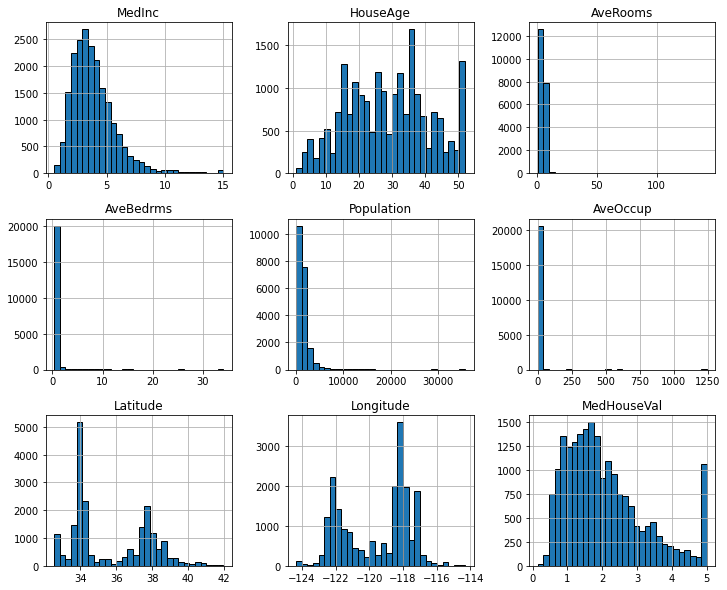

In [11]:
housing.frame.hist(bins=30, edgecolor="black", figsize=(12,10))
plt.show()

## The median income is a distribution with a long tail. It means that the salary of people is more or less normally distributed but there is some people getting a high salary.

## Regarding the average house age, the distribution is more or less uniform.

## The target distribution has a long tail as well. In addition, we have a threshold-effect for high-valued houses: all houses with a price above 5 are given the value 5.

In [12]:
cols = list(housing.frame.columns)
cols

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

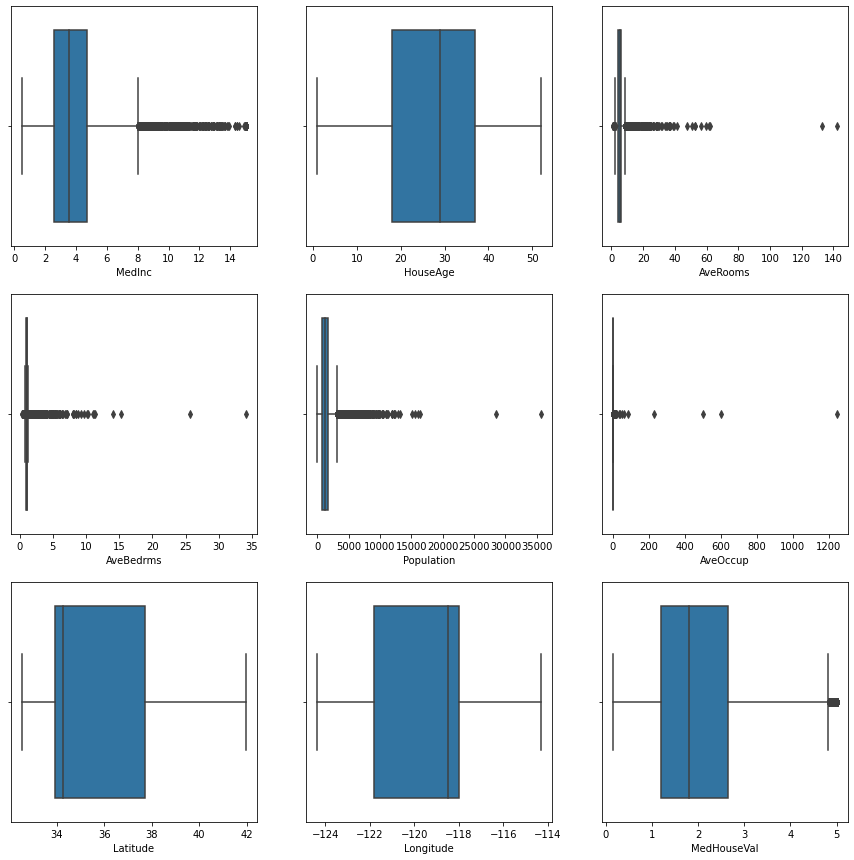

In [13]:
#Outlier detection with Boxplot
plt.figure(figsize=(15,15))
for j,i in enumerate(cols):
  plt.subplot(3, 3, j+1)
  sns.boxplot(housing.frame[i])
plt.show()

In [14]:
''' Detection '''
# IQR
Q1 = np.percentile(housing.frame['AveRooms'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(housing.frame['AveRooms'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)
 
print("Old Shape: ", housing.frame.shape)
 
# Upper bound
upper = list(np.where(housing.frame['AveRooms'] >= (Q3+1.5*IQR)))
# Lower bound
lower = list(np.where(housing.frame['AveRooms'] <= (Q1-1.5*IQR)))
 
print(len(upper[0]))
print(len(lower[0])) 

1.6116969213354757
Old Shape:  (20640, 9)
466
45


In [15]:
''' Removing the Outliers '''

housing.frame.drop(index = upper[0],axis=0, inplace = True)
housing.frame.drop(index = lower[0],axis =0, inplace = True)
 
print("New Shape: ", housing.frame.shape)

New Shape:  (20129, 9)


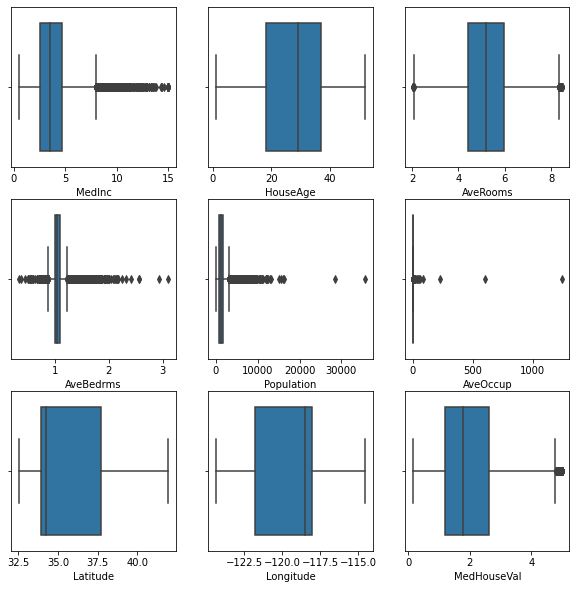

In [16]:
#Outlier detection with Boxplot
plt.figure(figsize=(10,10))
for j,i in enumerate(cols):
  plt.subplot(3, 3, j+1)
  sns.boxplot(housing.frame[i])
plt.show()

In the same way we can remove more outliers.

<Figure size 1080x1080 with 0 Axes>

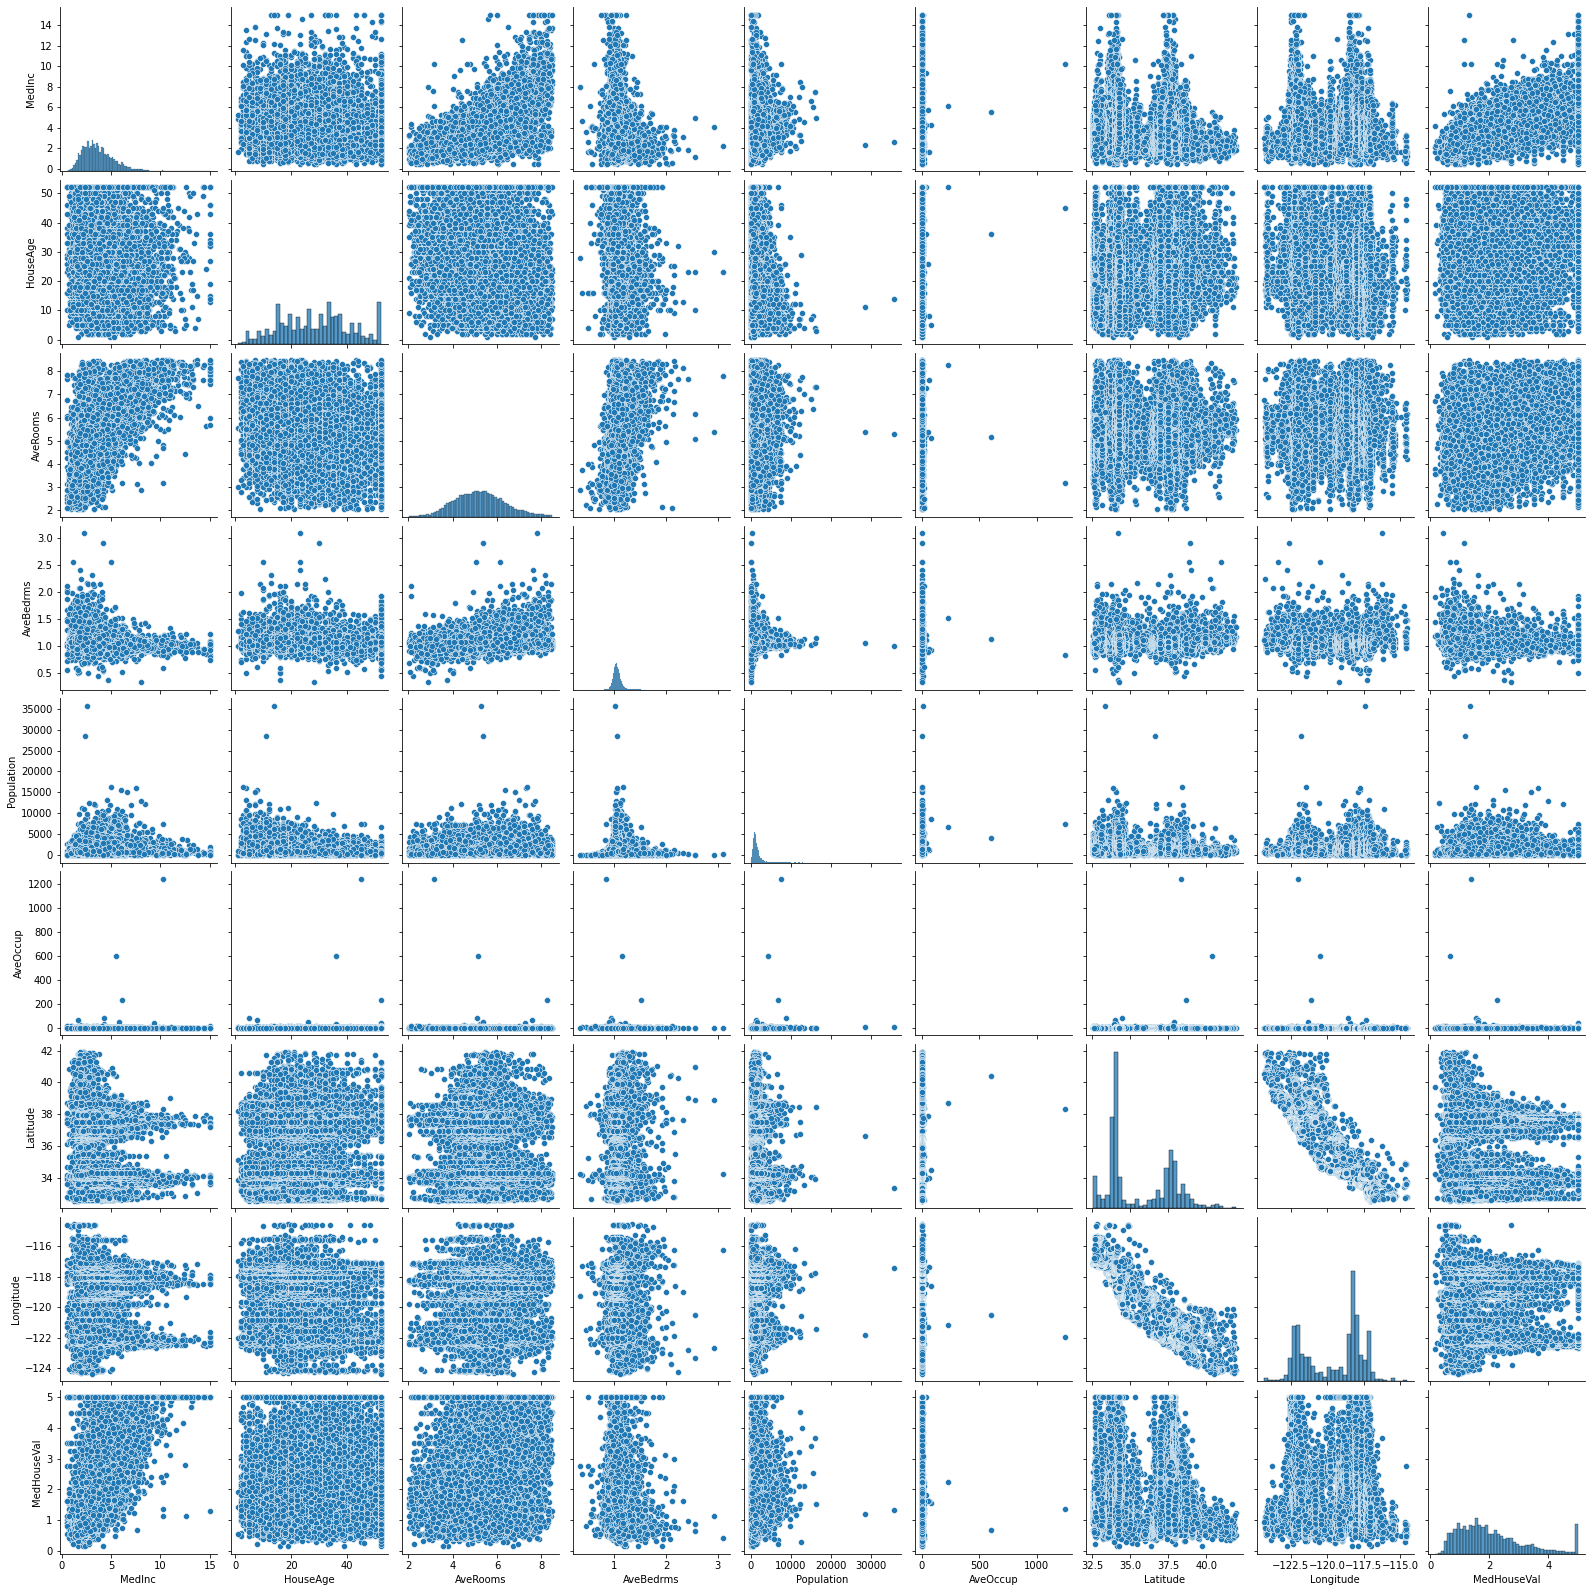

In [17]:
plt.figure(figsize=(15,15))
sns.pairplot(housing.frame)
plt.show()

In [18]:
X = housing.frame.drop('MedHouseVal', axis=1)
y = housing.frame['MedHouseVal']

In [19]:
from sklearn.model_selection import train_test_split
#train_X, test_X, train_y, test_y = train_test_split(housing.data, housing.target, test_size = 0.25, random_state= 13)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state= 13)
print(train_X.shape, train_y.shape,test_X.shape, test_y.shape)

(15096, 8) (15096,) (5033, 8) (5033,)


In [20]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
model1.fit(train_X, train_y)
print(model1.intercept_)
print(model1.coef_)

-36.487873583554276
[ 4.85888662e-01  1.10439334e-02 -1.61292625e-01  1.50274069e+00
  2.19489309e-06 -4.12064861e-03 -4.04067485e-01 -4.18250618e-01]


In [21]:
# Predicting the Test set results
pred_y = model1.predict(test_X)

In [22]:
resd=test_y-pred_y

In [23]:
import sklearn.metrics as metrics
mse_train = metrics.mean_squared_error(train_y,model1.predict(train_X))
print("Mean Squared Error on train set {}".format(mse_train))
mse_test = metrics.mean_squared_error(test_y,pred_y)
print("Mean Squared Error on test set {}".format(mse_test))

Mean Squared Error on train set 0.5020917011238023
Mean Squared Error on test set 0.4863873040280649


In [24]:
from sklearn.metrics import r2_score
r2_score(test_y, pred_y)

0.624355734610481

# **Assumptions - 1 : No multicollinearity between independent variables**
### How to test the multicollinearity between independent variables

1.   Correlation Method
2.   VIF

In [25]:
col1 = [1,2,3,4,5,6,7,8,9,10]
col2 = [2,3,4,5,6,7,8,9,10,11]
col3 = [2,3,5,7,4,8,5,8,9,10]
col4 = [2,4,7,9,10,13,14,16,17,18]

In [26]:
df1 = pd.DataFrame({"A":col1,"B":col2,"C":col3,"Target":col4})

In [27]:
X = df1.iloc[:,0:-1]
y = df1["Target"]

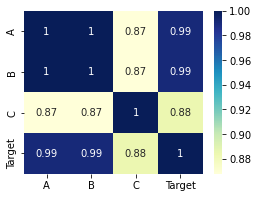

In [28]:
plt.figure(figsize=(4,3))
sns.heatmap(df1.corr(),cmap = "YlGnBu",annot=True)

In [29]:
df1.corr(method='pearson')[0:1]

,A,B,C,Target
A,1.0,1.0,0.86781,0.991024



cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

covariance = cov(data1, data2)

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

In [30]:
# Lets Calculate the Pearson using the pearsonr() SciPy function

corrA_B,_ =stats.pearsonr(df1.A,df1.B)
corrA_C,_ =stats.pearsonr(df1.A,df1.C)
#corrA_D,_ =stats.pearsonr(df1.A,df1.D)
corrA_T,_ =stats.pearsonr(df1.A,df1.Target)
print(corrA_B)
print(corrA_C)
#print(corrA_D)
print(corrA_T)

1.0
0.8678095050578114
0.9910236363585272


In [31]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF)

In [32]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,B,401.01
0,A,349.95
3,Target,65.07
2,C,4.71


# On dataset

In [33]:
housing.frame.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.126282,0.673481,-0.217394,0.011880,0.020056,-0.077315,-0.018602,0.681675
HouseAge,-0.126282,1.000000,-0.211797,-0.107486,-0.307999,0.010240,0.014127,-0.103752,0.109270
AveRooms,0.673481,-0.211797,1.000000,0.150175,-0.028519,-0.011661,0.126316,-0.088180,0.316198
AveBedrms,-0.217394,-0.107486,0.150175,1.000000,-0.015829,-0.013885,0.066087,-0.002286,-0.104218
Population,0.011880,-0.307999,-0.028519,-0.015829,1.000000,0.063344,-0.102639,0.101266,-0.025265
AveOccup,0.020056,0.010240,-0.011661,-0.013885,0.063344,1.000000,0.003331,0.004348,-0.029470
Latitude,-0.077315,0.014127,0.126316,0.066087,-0.102639,0.003331,1.000000,-0.929316,-0.141531
Longitude,-0.018602,-0.103752,-0.088180,-0.002286,0.101266,0.004348,-0.929316,1.000000,-0.047307
MedHouseVal,0.681675,0.109270,0.316198,-0.104218,-0.025265,-0.029470,-0.141531,-0.047307,1.000000


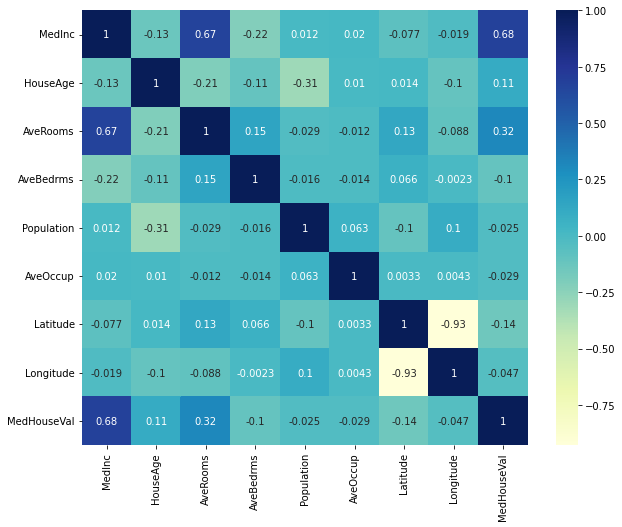

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(housing.frame.corr(),cmap = "YlGnBu",annot=True)

In [35]:
vif = pd.DataFrame()
vif['Features'] = housing.frame.columns
vif['VIF'] = [variance_inflation_factor(housing.frame.values, i) for i in range(housing.frame.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Longitude,788.44
6,Latitude,578.91
3,AveBedrms,119.61
2,AveRooms,56.68
0,MedInc,24.38
8,MedHouseVal,9.64
1,HouseAge,8.01
4,Population,2.97
5,AveOccup,1.11


**we can see that "Latitude" with "Longitude" and "AngBedrms" with "AvgRooms" both are highly corelated so we can drop one variable from each.**

1.   A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. 
2.  Multicollinearity reduces the precision of the estimate coefficients, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant.


## Problems if we have Multicollinearity

Multicollinearity  affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.


**In perspective of storing data in databases, storing correlated features is somehow similar to storing redundant information which it may cause wasting of storage and also it may cause inconsistent data after updating or editing tuples.**


If we add so much correlated features to the model we may cause the model to consider unnecessary features and we may have curse of high dimensionality problem, I guess this is the reason for worsening the constructed mode 

[why-is-it-bad-to-have-correlated-features](https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features#:~:text=In%20perspective%20of%20storing%20data,after%20updating%20or%20editing%20tuples.)

# **Assumptions - 2 : A Linear relationship between dependent & independent variables.**

### How to test the Linearity between Independent and dependent variables

nonlinearity is usually most evident in a plot of dependent variable is a straight-line function of each independent variable, holding the others fixed.


## **Use regression plot to check the linearity between Independent and dependent variables**

In [36]:
cols = list(housing.data.columns)
cols

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [37]:
y = "MedHouseVal"

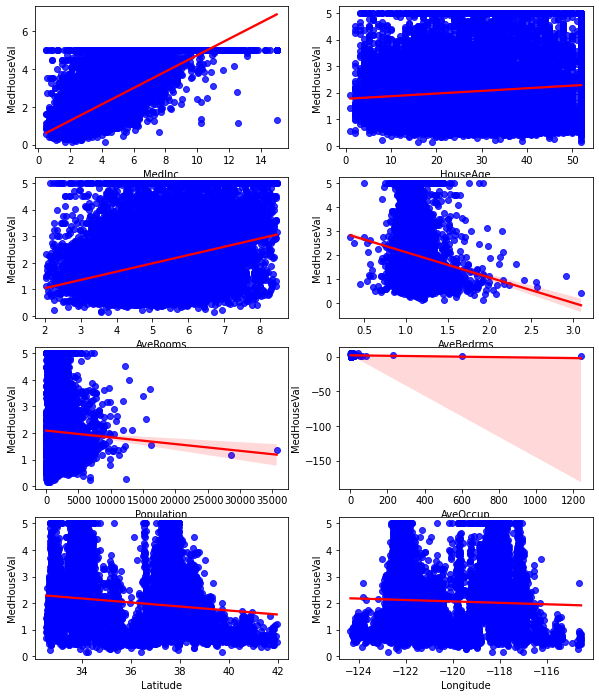

In [38]:
# draw regplot
plt.figure(figsize=(10,12))
for j,i in enumerate(cols): 
  plt.subplot(4, 2, j+1)
  sns.regplot(x = i, y = "MedHouseVal",  data = housing.frame,scatter_kws={"color": "blue"}, 
             line_kws={"color": "red"})
plt.show()

We can see that all the independent variables have the linear relationship with dependent variable. (if we remove all the outliers)

## **Rainbow Test :**
The basic idea of the Rainbow test is that even if the true relationship is non-linear, a good linear fit can be achieved on a subsample in the “middle” of the data. The null hypothesis is rejected whenever the overall fit is significantly worse than the fit for the subsample.

In [39]:
# Rainbow test does not work on sklearn model need to create OLS model
import statsmodels.api as sm
# Add a constant to get an intercept
train_X_sm = sm.add_constant(train_X)

# Fit the resgression line using 'OLS'
model_ols = sm.OLS(train_y, train_X_sm).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     2967.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:27:15   Log-Likelihood:                -16220.
No. Observations:               15096   AIC:                         3.246e+04
Df Residuals:                   15087   BIC:                         3.253e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.4879      0.784    -46.560      0.0

In [40]:
def Rainbow_test(model):
  lin = sm.stats.diagnostic.linear_rainbow(res=model)[1]  #2nd value is p-value
  if lin>0.1:
   result="Pass"
  return pd.DataFrame ([lin, 0.1,result], columns= ['Rainbow test'], index= ['Value', 'Threshold', 'Result'])
Rainbow_test(model_ols)

,Rainbow test
Value,0.984588
Threshold,0.1
Result,Pass


We can also use **Harvey Collier Test** to check linearity.

[rainbow_and_harvey_collier](https://https://solutionshala.com/2020/12/11/how-to-test-linearity-in-parameters-for-linear-regression/)

### Problem if we apply LR in non-linear data

Regression line will not capture much information due to distribution of data points and LR will not be able to provide the correct prediction.
### Solution if we have non-linear relationship

If the relationship is non-Linear we can use Non-Linear model works.

# **Assumptions - 3 : Residuals(errors) should be homoscedastic.**
### **How to test homoscedasticity**

*   residual vs fitted values(predicted values) plot.
*   plot the residuals versus independent variables to look for consistency there as well
*   Use statistical Breusch-Pagan test or White general test, Goldfeld Test  to detect this phenomenon.



**1. plot the residuals versus predicted values**

[]

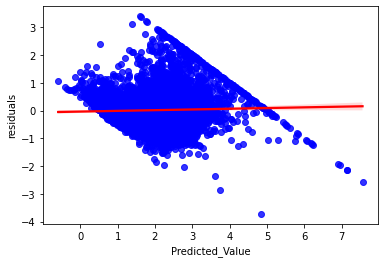

In [41]:
sns.regplot(y = resd,x=(pred_y),scatter_kws={"color": "blue"},line_kws={"color": "red"})
plt.ylabel("residuals")
plt.xlabel("Predicted_Value")
plt.plot()

**2.plot the residuals versus independent variables** 

In [42]:
resd_df= pd.DataFrame(test_X).copy()
resd_df["residual"]=resd
resd_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,residual
11704,10.2252,14.0,7.100000,1.046154,420.0,3.230769,33.89,-117.97,-0.068758
451,1.7778,30.0,3.447059,1.032941,862.0,2.028235,37.87,-122.27,1.153483
11777,2.7188,43.0,5.188755,1.232932,647.0,2.598394,38.75,-121.27,-0.525269
2619,2.3147,18.0,4.626866,1.029851,941.0,2.808955,40.94,-124.08,-0.280428
7104,4.3831,35.0,5.201183,0.914201,972.0,2.875740,33.90,-118.00,-0.111226
...,...,...,...,...,...,...,...,...,...
20581,3.1534,20.0,5.444976,1.057416,459.0,2.196172,38.83,-122.21,-0.158420
4256,2.3250,18.0,3.681900,1.165771,2103.0,1.884409,34.10,-118.35,0.783294
4887,2.0703,46.0,3.773414,1.078550,1607.0,4.854985,34.02,-118.26,-0.589703
11562,3.3125,22.0,4.069987,1.014805,2357.0,3.172275,33.75,-117.99,-0.019343


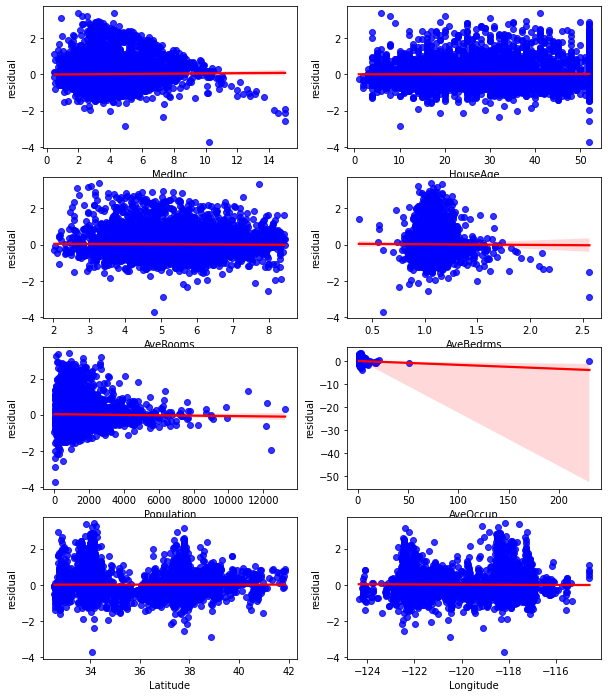

In [43]:
# draw regplot
plt.figure(figsize=(10,12))
for j,i in enumerate(test_X): 
  plt.subplot(4, 2, j+1)
  sns.regplot(x = i, y = 'residual', data = resd_df,scatter_kws={"color": "blue"}, 
             line_kws={"color": "red"})
plt.show()

**3. Use statistical Breusch-Pagan test**

In [44]:
'''
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
# Get the test result
test_result = sm.stats.het_breuschpagan(model_ols.resid, model_ols.model.exog)
test_result'''

"\nnames = ['Lagrange multiplier statistic', 'p-value',\n         'f-value', 'f p-value']\n# Get the test result\ntest_result = sm.stats.het_breuschpagan(model_ols.resid, model_ols.model.exog)\ntest_result"

In [45]:
def Breusch_Pagan(resid,exog):
  result='fail'
  test_result = sm.stats.het_breuschpagan(resid,exog)[1]
  if test_result<0.05:
    result="Pass"
  return pd.DataFrame ([test_result,0.05,result], columns= ['Breush_Pagan_test'], index= ['Value', 'Threshold', 'Result'] )
Breusch_Pagan(model_ols.resid, model_ols.model.exog)

,Breush_Pagan_test
Value,0.0
Threshold,0.05
Result,Pass


### Problem if we have heteroscedasticity

Bigger residuals imply greater error in Solution.
Solution if we have heteroscedasticity

### To overcome heteroscedasticity:
 a possible way is to transform the response variable such as log(Y) or √Y. Also, we can use weighted least square method to tackle heteroscedasticity.

[heteroscedasticity in regression](https://www.statology.org/heteroscedasticity-regression/)

# **Assumptions - 4 : Residuals should be normally distributed.**
Technically, the normal distribution assumption is not necessary if you are willing to assume the model equation is correct and your only goal is to estimate its coefficients and generate predictions in such a way as to minimize mean squared error.

Sometimes the error distribution is "skewed" by the presence of a few large outliers.

### How to test normality test of residuals



1.   Distplot of residuals
2.   QQ plot
3.   Shapiro-Wilk test or Jarque Bera Test

**1. Distplot of residuals**

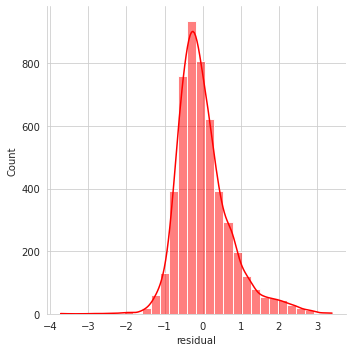

In [46]:
# set the background style of the plot
sns.set_style('whitegrid')
sns.displot(resd_df,x="residual", kde = True, color ='red', bins = 30)
plt.show()

In [47]:
resd_df['residual'].mean()

0.015582297814325088

**2. Q-Q plot**

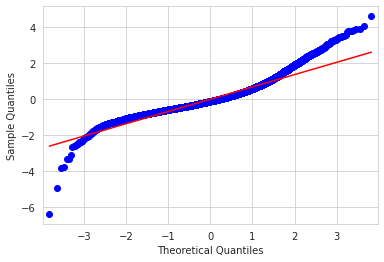

In [48]:
sm.qqplot(model_ols.resid, line ='r')
plt.show()
#  If the distribution is normal, the points on such a plot should fall close to the diagonal reference line. 


**we can see that error is not completely normalised.**

A bow-shaped pattern of deviations from the diagonal indicates that the residuals have excessive skewness (i.e., they are not symmetrically distributed, with too many large errors in one direction). 

 An S-shaped pattern of deviations indicates that the residuals have excessive kurtosis--i.e., there are either too many or two few large errors in both directions.  

Sometimes the problem is revealed to be that there are a few data points on one or both ends that deviate significantly from the reference line ("outliers"), in which case they should get close attention.

## **3. Shapiro-Wilk test and jarque bera**
both don't work for more than 5000 values.

The Shapiro–Wilk test is a test of normality in frequentist statistics.

In [49]:
from scipy.stats import shapiro
#perform Shapiro-Wilk test
stat,p = shapiro(resd_df['residual'])
print("The Test-Statistic and p-value are as follows:\nTest-Statistic = %.3f , p-value = %.3f"%(stat,p))

The Test-Statistic and p-value are as follows:
Test-Statistic = 0.931 , p-value = 0.000


**Since p-value is less than 0.05, then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a normal distribution.**

Here it is mainly because of outliers 

In [50]:
from scipy.stats import jarque_bera
jarque_bera(resd_df['residual']) #left value is p-value'''

(2173.156412222562, 0.0)

**Since p-value is less than 0.05, then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a normal distribution.**

### Problem if residulas are not completety Normalised

Real data rarely has errors that are perfectly normally distributed, and it may not be possible to fit your data with a model whose errors do not violate the normality assumption at the 0.05 level of significance. 

One thing to keep in mind is that as the sample size increases, the likelihood of violating this assumption increases.

### Solution if residulas are not completety Normalised

Transform the dataset 

violations of normality often arise either because (a) the distributions of the dependent and/or independent variables are themselves significantly non-normal, and/or (b) the linearity assumption is violated. In such cases, a nonlinear transformation of variables might cure both problems.


[Residual not Normally distributed](https://www.researchgate.net/post/Why-do-the-residuals-need-to-be-normal-when-carrying-out-multi-level-modeling#:~:text=When%20the%20residuals%20are%20not,all%20trends%20in%20the%20dataset.)[,and other](https://stats.stackexchange.com/questions/100214/assumptions-of-linear-models-and-what-to-do-if-the-residuals-are-not-normally-di)

# **Assumptions - 5 : No autocorrelation in the regression residuals**
Autocorrelation occurs when the residuals are not independent from each other. In other words when the value of y(x+1) is not independent from the value of y(x). Autocorrelation refers to the degree of correlation between the values of the same variables across different observations in the data.

# How to test autocorrelation in residuals

### Graphical Method to analyse Autocorrelation
### A common method is the Durbin-Watson test.

Look for Durbin – Watson (DW) statistic.It must lie between 0 and 4.

If DW = 2, or close to it, implies no autocorrelation

0 < DW < 2 implies positive autocorrelation

while 2 < DW < 4 indicates negative autocorrelation

Also, we can see residual vs time plot and look for the seasonal or correlated pattern in residual values in time series analysis.

**1. Graphical Method to analyse Autocorrelation**

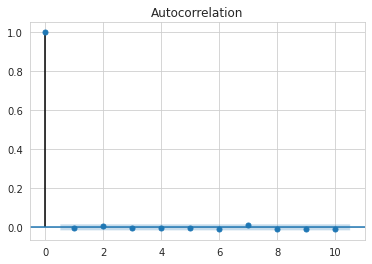

In [51]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model_ols.resid, lags=10 )
acf.show()

**2. Durbin-Watson test.**

In [52]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model_ols.resid)

2.0100492984861136

**as value is close to 2 it implies no autocorrelation**

### Problem if autocorrelation in residuals

The presence of correlation in error terms drastically reduces model’s accuracy.

It causes confidence intervals and prediction intervals to be narrower. Narrower confidence interval means that a 95% confidence interval would have lesser probability than 0.95 that it would contain the actual value of coefficients.

### Solution if autocorrelation in residuals

Adding other variables as independent variables

Transforming variables into different functional forms
*   Deviation from average values
*   Log form
*   Exponential form

Clustering on different time invariant factors

Experimenting with model specification

### **Useful links **

https://www.statology.org/shapiro-wilk-test-python/

https://www.statology.org/jarque-bera-test-python/

https://www.statology.org/breusch-pagan-test/

https://github.com/atulpatelDS/Youtube/blob/main/Machine_Learning/Linear_Regression/Verifying%20the%20Assumptions%20of%20Linear%20Regression%20in%20Python%20and%20Stats%20Library.ipynb

https://github.com/vikrantarora25/Car-Price-Prediction-Highly-Comprehensive-Linear-Regression-Project-

https://github.com/parimalbhoyar25/Linear-Regression-with-Assumptions/blob/master/Linear%20Regression%20with%20Assumptions.ipynb
